<a href="https://colab.research.google.com/github/yewern/LSTM-Stock-Prediction/blob/main/FYP_Final_SF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# ***Stock Prediction Using Multivariate LSTM With Technical, Fundamental and Macroeconomic Indicators***




## **Step 1: Exploration on each dataset**

In [ ]:
import pandas as pd
#reading csv files for each dataset

MSFT=pd.read_csv("/content/MSFT YF.csv")
GCF =pd.read_csv("/content/GCF.csv")
DXY=pd.read_csv("/content/DXY.csv")
CIF=pd.read_csv("/content/CLF.csv")
TYX=pd.read_csv("/content/TYX.csv")
EPS=pd.read_csv("/content/EPS.csv")

data = [MSFT,GCF,DXY,CIF,TYX,EPS]
#retriving summary statistics for each dataset
for x in data:
  x.info()

for x in data:
  stats = x.describe()
  stats.loc['skew'] = x.skew(numeric_only=True).tolist()
  stats.loc['kurt'] = x.kurtosis(numeric_only=True).tolist()
  print(stats)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5037 entries, 0 to 5036
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5037 non-null   object 
 1   Open       5037 non-null   float64
 2   High       5037 non-null   float64
 3   Low        5037 non-null   float64
 4   Close      5037 non-null   float64
 5   Adj Close  5037 non-null   float64
 6   Volume     5037 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 275.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5137 entries, 0 to 5136
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      5137 non-null   object 
 1   Price     5137 non-null   float64
 2   Open      5137 non-null   float64
 3   High      5137 non-null   float64
 4   Low       5137 non-null   float64
 5   Vol.      5137 non-null   object 
 6   Change %  5137 non-null   object 
dtypes: float

After Data Exploration on the original dataset retreieved from the internet, **calculation** is performed to derive attributes (PE, PEG, MA10, STD10, ROC, RSI).

Then, these datasets are **merged** together based on the "Dates" variable.

The merged dataset contains **missing values** as some datasets includes weekends when the stock market is closed. Hence, all rows with missing values are removed from the dataset.

All the calculation and processing mentioned above are performed with **Ms Excel**

## **Step 2: Regression**

A stepwise regression is performed with a significance level of 0.05 for predictors to entry and leave the model.  At the 7th step, all variables left in the model are significant at the 0.05 level. No other variable met the 0.05 significance level for entry into the model anymore. The regression model is performed in SAS Enterprise Guide below shows the linear regression output:

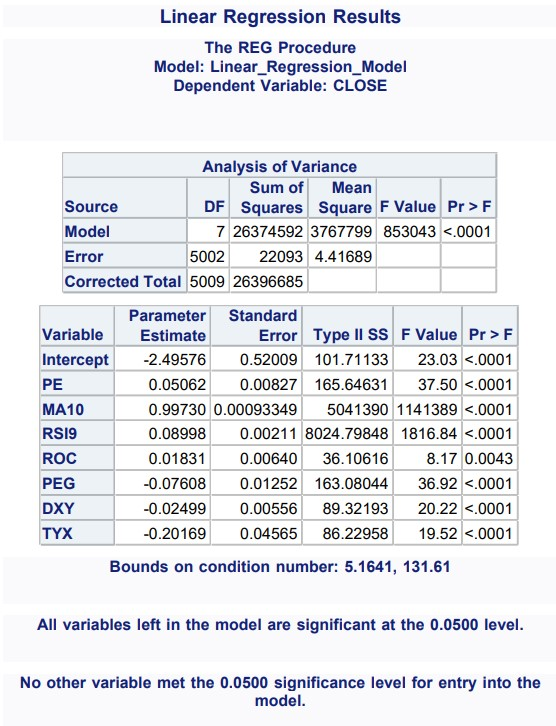

## **Step 3: Plot of all variables**



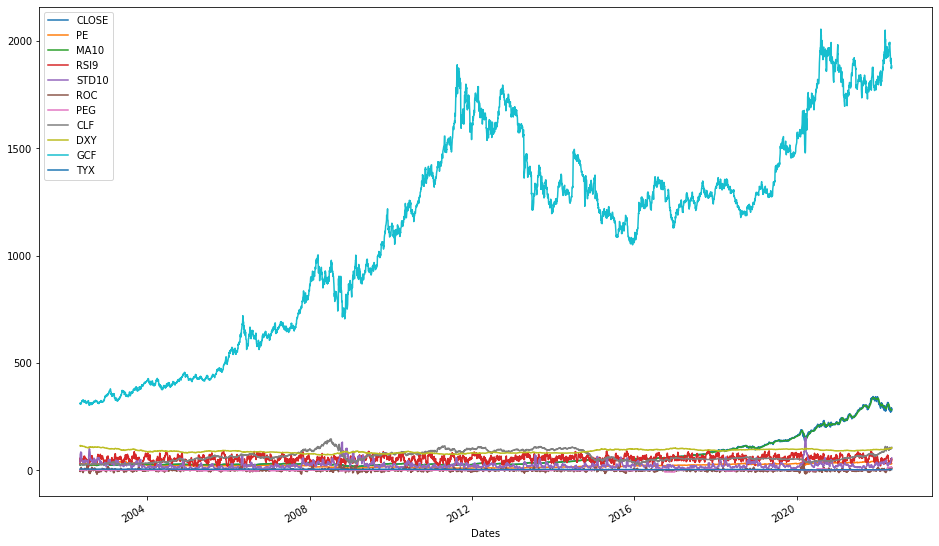

In [ ]:
#merging of datasets is performed with Ms Excel
#reading merged dataset
df1=pd.read_csv("/content/dataset.csv", dayfirst=True, parse_dates=["Dates"],index_col=[0])

#creating a plot with all variable
df1.plot(y=['CLOSE','PE','MA10','RSI9','STD10','ROC','PEG ','CLF','DXY','GCF','TYX'], figsize=(16, 10), kind = 'line')

## **Step 4: Data Processing**

In [ ]:
from sklearn.preprocessing import minmax_scale
#scale data using minmax_scale
df1[['CLOSE','PE','MA10','RSI9','STD10','ROC','PEG ','CLF','DXY','GCF','TYX']] = minmax_scale(df1[['CLOSE','PE','MA10','RSI9','STD10','ROC','PEG ','CLF','DXY','GCF','TYX']])

#summary statistics of the scaled data
df1.info()
stats = df1.describe()
stats.loc['skew'] = df1.skew(numeric_only=True).tolist()
stats.loc['kurt'] = df1.kurtosis(numeric_only=True).tolist()
print(stats)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5010 entries, 2002-05-07 to 2022-05-05
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CLOSE   5010 non-null   float64
 1   PE      5010 non-null   float64
 2   MA10    5010 non-null   float64
 3   RSI9    5010 non-null   float64
 4   STD10   5010 non-null   float64
 5   ROC     5010 non-null   float64
 6   PEG     5010 non-null   float64
 7   CLF     5010 non-null   float64
 8   DXY     5010 non-null   float64
 9   GCF     5010 non-null   float64
 10  TYX     5010 non-null   float64
dtypes: float64(11)
memory usage: 469.7 KB
             CLOSE           PE         MA10         RSI9        STD10  \
count  5010.000000  5010.000000  5010.000000  5010.000000  5010.000000   
mean      0.158212     0.398382     0.157737     0.504507     0.142128   
std       0.221349     0.243485     0.224211     0.175987     0.104285   
min       0.000000     0.000000     0.000000     0.0000

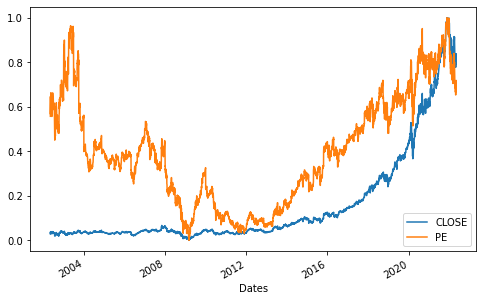

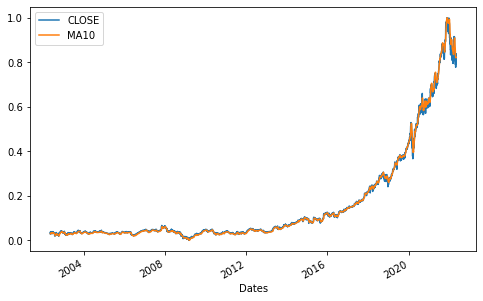

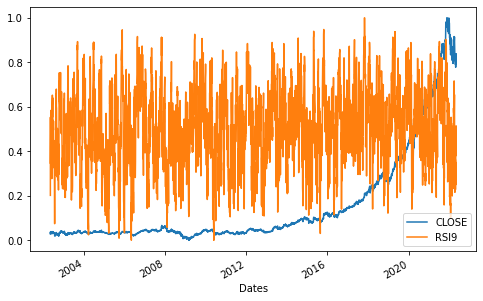

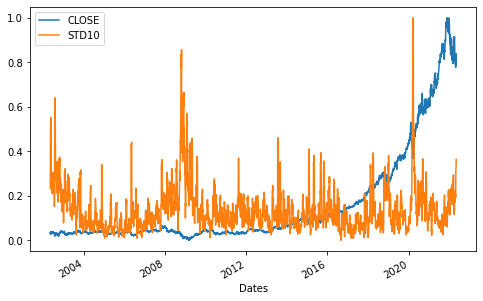

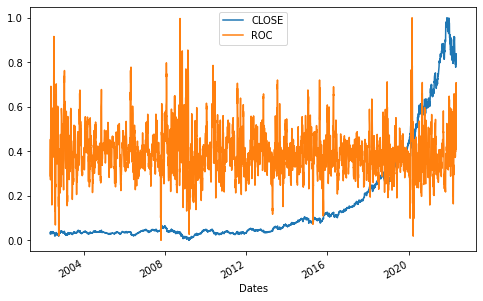

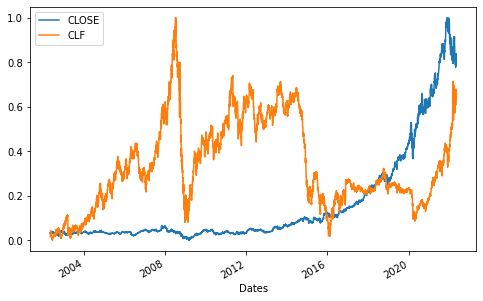

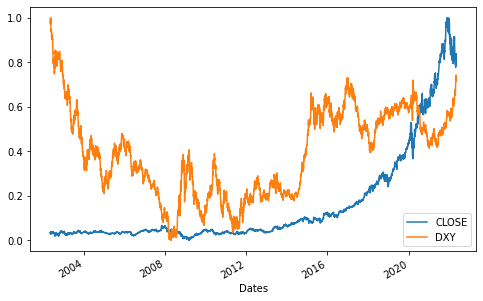

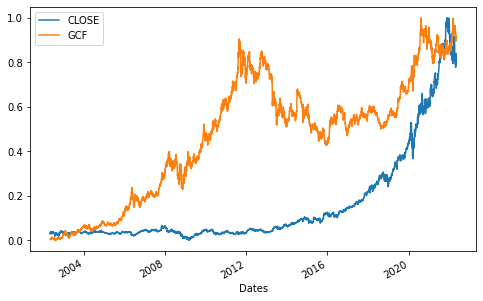

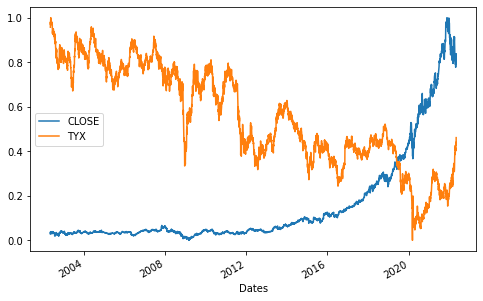

In [ ]:
#visualize the data after scaling
variable = ['PE','MA10','RSI9','STD10','ROC','CLF','DXY','GCF','TYX']

for x in variable:
  df1.plot(y=['CLOSE',x], figsize=(8,5), kind = 'line')


In [ ]:
#The modelling and processing code of this project created references the source code from GitHub
#https://github.com/flo7up/relataly-public-python-tutorials/blob/master/007%20Time%20Series%20Forecasting%20-%20Multivariate%20Time%20Series%20Models.ipynb

import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
df1=pd.read_csv("/content/dataset.csv", dayfirst=True, parse_dates=["Dates"],index_col=[0])

#the best prediction model obtained is based on the model with input variable selected by regression
#the regression model suggested to remove STD10, CLF and GCF
df1.drop(['STD10','CLF','GCF'], axis=1, inplace=True)

from numpy.random import seed
from tensorflow.random import set_seed

#setting he seed
seed(0)
set_seed(0)

# Indexing
train_df = df1.sort_values(by=['Dates']).copy()
data = pd.DataFrame(train_df)

# We add a prediction column and set dummy values to prepare the data for scaling
data_ext = data.copy()
data_ext['Prediction'] = data_ext['CLOSE']

# Get the number of rows in the data
nrows = data.shape[0]

# Convert the data to numpy values
np_data_unscaled = np.array(data)
np_data = np.reshape(np_data_unscaled, (nrows, -1))
print(np_data.shape)

# Transform the data by scaling each feature to a range between 0 and 1
scaler = MinMaxScaler()
np_data_scaled = scaler.fit_transform(np_data_unscaled)

# Creating a separate scaler that works on a single column for scaling predictions
scaler_pred = MinMaxScaler()
df_Close = pd.DataFrame(data_ext['CLOSE'])
np_Close_scaled = scaler_pred.fit_transform(df_Close)

(5010, 8)


In [ ]:
# Set the sequence length - this is the timeframe used to make a single prediction
sequence_length = 100
# Prediction Index
index_Close = data.columns.get_loc("CLOSE")

# Create the training and test data
train_data = np_data_scaled[:-506]
test_data = np_data_scaled[-506:]

# The RNN needs data with the format of [samples, time steps, features]
# Here, we create N samples, sequence_length time steps per sample, and 10 features
def partition_dataset(sequence_length, data):
    x, y = [], []
    data_len = data.shape[0]
    for i in range(sequence_length, data_len):
        x.append(data[i-sequence_length:i,:]) #contains sequence_length values 0-sequence_length * columsn
        y.append(data[i, index_Close]) #contains the prediction values for validation,  for single-step prediction

    # Convert the x and y to numpy arrays
    x = np.array(x)
    y = np.array(y)
    return x, y

# Generate training data and test data
x_train, y_train = partition_dataset(sequence_length, train_data)
x_test, y_test = partition_dataset(sequence_length, test_data)

# Print the shapes: the result is:
# (rows, sequence_length, features) (prediction value, )
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(4404, 100, 8) (4404,)
(406, 100, 8) (406,)


In [ ]:
# Validate that the prediction value and the input match up
# The last close price of the second input sample should equal the first prediction value
print(x_train[1][sequence_length-1][index_Close])
print(y_train[0])

0.024286498353457732
0.024286498353457732


## **Step 5: Modelling and Hyperparameter tuning**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout, Activation
import matplotlib.pyplot as plt
import seaborn as sns # Visualization
sns.set_style('white', { 'axes.spines.right': False, 'axes.spines.top': False})
from tensorflow.keras.initializers import GlorotNormal
from tensorflow.keras.optimizers import Adam
from tensorflow.random import set_seed
from numpy.random import seed

#setting he seed
seed(0)
set_seed(0)

# Configure the neural network model
model = Sequential()

model.add(LSTM(200,kernel_initializer=GlorotNormal(),activation='tanh',
return_sequences=False, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dense(1,kernel_initializer=GlorotNormal(),activation='linear'))

optimizer = Adam(learning_rate=0.001)
# Compile the model
model.compile(optimizer=optimizer, loss='mse')

# Training the model
epochs = 200
batch_size = 32

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test))

Epoch 1/200
138/138 [==============================] - 4s 13ms/step - loss: 6.3688e-04 - val_loss: 5.5850e-04
Epoch 2/200
138/138 [==============================] - 1s 8ms/step - loss: 2.6507e-05 - val_loss: 5.1139e-04
Epoch 3/200
138/138 [==============================] - 1s 8ms/step - loss: 2.3571e-05 - val_loss: 2.4513e-04
Epoch 4/200
138/138 [==============================] - 1s 8ms/step - loss: 2.3368e-05 - val_loss: 2.0065e-04
Epoch 5/200
138/138 [==============================] - 1s 8ms/step - loss: 1.6535e-05 - val_loss: 6.3453e-04
Epoch 6/200
138/138 [==============================] - 1s 10ms/step - loss: 1.8744e-05 - val_loss: 2.8068e-04
Epoch 7/200
138/138 [==============================] - 2s 12ms/step - loss: 2.0830e-05 - val_loss: 1.8244e-04
Epoch 8/200
138/138 [==============================] - 1s 8ms/step - loss: 2.2688e-05 - val_loss: 2.1942e-04
Epoch 9/200
138/138 [==============================] - 1s 8ms/step - loss: 2.2398e-05 - val_loss: 1.6803e-04
Epoch 10/200
138

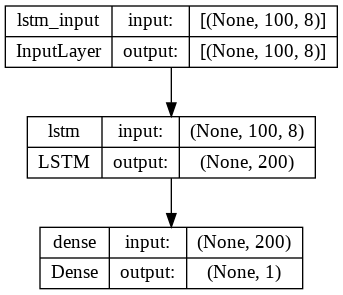

In [ ]:
#visualize model architecture
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Get the predicted values
y_pred_scaled = model.predict(x_test)


# Unscale the predicted values
y_pred = scaler_pred.inverse_transform(y_pred_scaled)
y_test_unscaled = scaler_pred.inverse_transform(y_test.reshape(-1, 1))

y_test_unscaled, y_pred = np.array(y_test_unscaled), np.array(y_pred)

13/13 [==============================] - 0s 5ms/step


In [ ]:
#retrirving the min validation loss and its respective epoch
print('The minimum validation loss (MSE) is: ',min(history.history['val_loss']),
      '. The respective epoch is: ', (history.history['val_loss'].index(min(history.history['val_loss']))+1)  )


The minimum validation loss (MSE) is:  6.827797187725082e-05 . The respective epoch is:  200


In [ ]:
#retriving the R squared value
from sklearn.metrics import r2_score

R_square = r2_score(y_test, y_pred_scaled)
print('Coefficient of Determination', R_square)


Coefficient of Determination 0.9953434675487847


In [ ]:
# import the module
from sklearn.metrics import mean_absolute_error as mae

# calculate MAE
error = mae(y_test, y_pred_scaled)

# display
print("Mean absolute error : " + str(error))

Mean absolute error : 0.006173271581302534


## **Step 6: Result visualization**


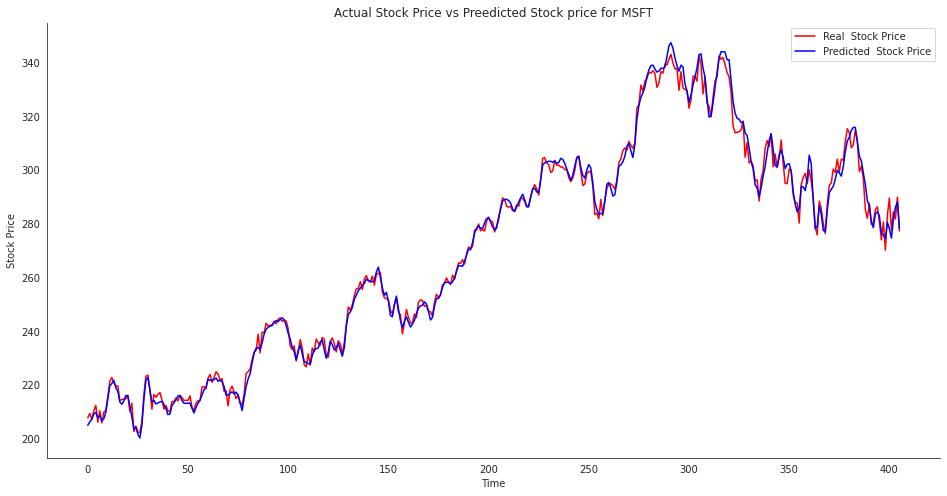

In [ ]:
#graph
fig, ax1 = plt.subplots(figsize=(16, 8))
plt.plot(y_test_unscaled, color = 'red', label = 'Real  Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted  Stock Price')
plt.title("Actual Stock Price vs Preedicted Stock price for MSFT")
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

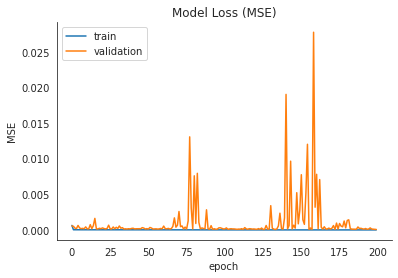

<Figure size 7200x1440 with 0 Axes>

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss (MSE)')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.figure(figsize=(100, 20))
plt.show()

## **Step 7: Predicting next day stock price**

In [ ]:
new_df = df1[-100:]


# Get the last N day closing price values and scale the data to be values between 0 and 1
last_N_days = new_df[-100:].values
last_N_days_scaled = scaler.transform(last_N_days)

# Create an empty list and Append past N days
X_test_new = []
X_test_new.append(last_N_days_scaled)

# Convert the X_test data set to a numpy array and reshape the data
pred_price_scaled = model.predict(np.array(X_test_new))
pred_price_unscaled = scaler_pred.inverse_transform(pred_price_scaled.reshape(-1, 1))

# Print last price and predicted price for the next day
price_today = np.round(new_df['CLOSE'][-1], 2)
predicted_price = np.round(pred_price_unscaled.ravel()[0], 2)
change_percent = np.round(100 - (price_today * 100)/predicted_price, 2)

plus = '+'; minus = ''
print(f'The close price for MSFT at 2022-05-05 was {price_today}')
print(f'The predicted close price for 2022-05-06 is {predicted_price} ({plus if change_percent > 0 else minus}{change_percent}% change based on yesterday price)')




1/1 [==============================] - 0s 31ms/step
The close price for MSFT at 2022-05-05 was 277.35
The predicted close price for 2022-05-06 is 275.1600036621094 (-0.8% change based on yesterday price)
